'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


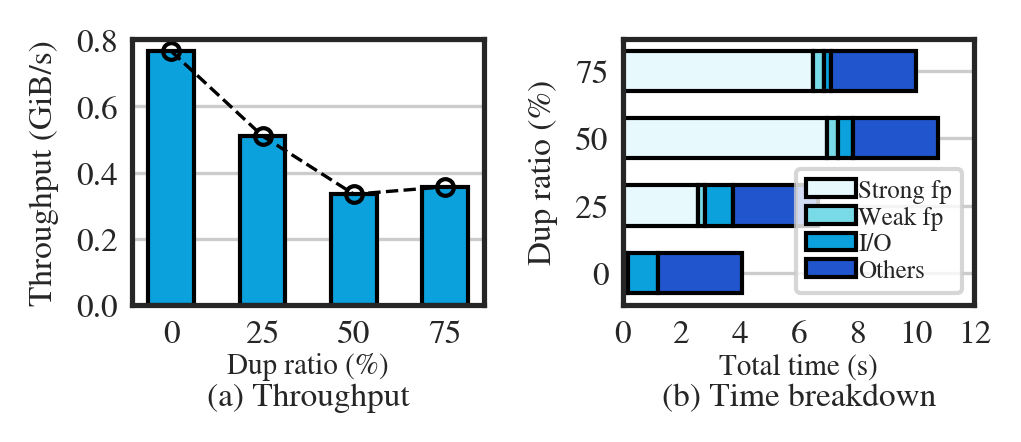

In [2]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.8
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
#     df = pd.read_csv(f, sep=r'[\t\ ]', index_col=None, engine='python')
with open("./breakdown-table", "r") as f:
    df = pd.read_csv(f, sep=r'[\t\ ]', index_col=None, engine='python')


# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4)))
# Reference: https://designbro.com/blog/inspiration/color-combinations/
title_a = "(a) Throughput"
title_b = "(b) Time breakdown"
colors_a = ["#0AA1DD"]
colors_b = ["#F7EC09", "#3EC70B", "#3B44F6", "#A149FA"]
colors_b = ["#E8F9FD", "#79DAE8", "#0AA1DD", "#2155CD"]
bar_width_a = 0.5
bar_width_b = 0.6

x_labels = df["dup_rate"]
x = list(range(1, len(x_labels) + 1))

# Figure a
subfig = plt.subplot(1, 2, 1)
plt.bar(x, df["bw"] / 1024, color=colors_a[0], width=bar_width_a, edgecolor='black')
plt.plot(x, df["bw"] / 1024, color='black', linestyle='dashed', linewidth=0.8, marker='o', markersize=4, mfc='none')
plt.yticks(list(np.arange(0, 0.9, 0.2)), fontsize = 8)
plt.xticks(x, labels=x_labels, fontsize = 8)
plt.ylabel("Throughput (GiB/s)", fontsize = 8)
subfig.text(0.5, -0.23, "Dup ratio (%)", ha='center', va='center', fontsize=7, transform=subfig.transAxes)
plt.xlabel(title_a, fontsize = 8, labelpad = 8)

# Figure b
subfig = plt.subplot(1, 2, 2)
times = ["strong_fp_time", "weak_fp_time", "IO_time", "others"]
left = 0 
for idx, time in enumerate(times):
    width = df[time] / 1000000000 # s
    plt.barh(y=x, width=width, color=colors_b[idx], edgecolor='black', left=left, height=bar_width_b)
    left = left + width

plt.yticks(x, labels=x_labels, fontsize=8)
plt.xticks(list(range(0, 13, 2)), fontsize=8)
plt.ylabel("Dup ratio (%)", fontsize=8)
subfig.text(0.5, -0.23, "Total time (s)", ha='center', va='center', fontsize=7, transform=subfig.transAxes)
plt.xlabel(title_b, fontsize = 8, labelpad = 8)
legends = ["Strong fp", "Weak fp","I/O", "Others"]
plt.legend(legends, loc='lower right', bbox_to_anchor=(1.0, 0), fontsize=6, frameon=True, labelspacing=0.1, handletextpad=0.1)

plt.tight_layout()
plt.savefig("./FIG-Breakdown.pdf", bbox_inches='tight', pad_inches=0)
